In [42]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL #image lib
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [43]:
data_url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir=tf.keras.utils.get_file('flower_photos',origin=data_url,cache_dir=".", untar=True)
#cache_dir=where you use to put you datafile in this directory or another
#untar=opening a zip file

In [44]:
data_dir

'.\\datasets\\flower_photos'

In [45]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [46]:
len(list(data_dir.glob('*/*.jpg'))) #glob - give all values/images which you need

3670

In [47]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

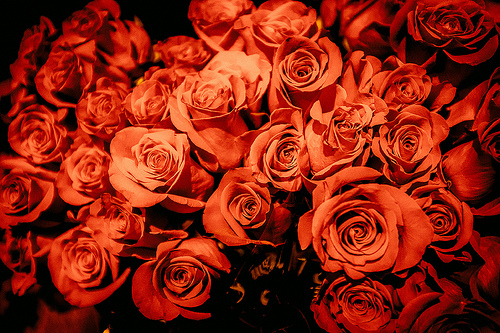

In [48]:
PIL.Image.open(str(roses[2]))

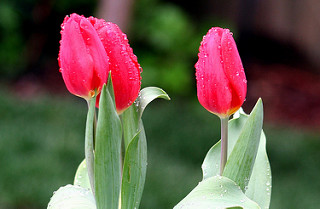

In [49]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [50]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [51]:
flowers_label_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [52]:
#reading image and cunverting into numpy array
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [53]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [54]:
x,y=[],[]
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_label_dict[flower_name])
    

In [55]:
x=np.array(x)
y=np.array(y)

# Train Test split

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [57]:
#preprocessing
x_train_scaled=x_train/255
x_test_scaled=x_test/255


In [58]:
#making CNN model
num_classes=5
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    #Adding Flatten layer
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes),
])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [59]:
model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - accuracy: 0.3450 - loss: 1.4882
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 181ms/step - accuracy: 0.5966 - loss: 1.0040
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 205ms/step - accuracy: 0.6926 - loss: 0.7819
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 209ms/step - accuracy: 0.7799 - loss: 0.5698
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 207ms/step - accuracy: 0.8553 - loss: 0.4152
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 206ms/step - accuracy: 0.9357 - loss: 0.1920
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - accuracy: 0.9645 - loss: 0.1183
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 196ms/step - accuracy: 0.9779 - loss: 0.0802
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 174ms/step - accuracy: 0.9888 - loss: 0.0474
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 179ms/step - accuracy: 0.9793 - loss: 0.0551
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - accuracy: 0.9971 - loss: 0.0154
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16

In [60]:

model.evaluate(x_test_scaled,y_test)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.6819 - loss: 2.2751


[2.2230279445648193, 0.6764705777168274]

In [61]:

predictions = model.predict(x_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step


array([[  3.917504  ,  22.080818  ,  -1.8463172 , -14.121399  ,
         -5.111244  ],
       [ 11.391435  ,   3.1006172 ,  -9.493051  ,  -6.2561026 ,
          2.0908635 ],
       [ -1.9899863 ,   3.659464  ,  13.910412  ,  -8.285815  ,
         -6.774918  ],
       ...,
       [  4.063487  ,   1.0191993 ,  -9.143527  ,   5.861367  ,
          3.968713  ],
       [  2.7797809 ,   7.601749  ,   0.7171109 ,   0.46081582,
         -6.3084793 ],
       [ -1.2383631 , -11.949809  ,   2.3349564 ,   7.821692  ,
          3.857689  ]], dtype=float32)

In [62]:
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.2935184e-08, 1.0000000e+00, 4.0604776e-11, 1.8948589e-16,
       1.5510913e-12], dtype=float32)>

In [63]:
np.argmax(score)

1

In [70]:
#data augumentation  fro reduce overfittng
img_height = 180
img_width = 180
data_augmentation=keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  

])

C:\Users\hpw\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


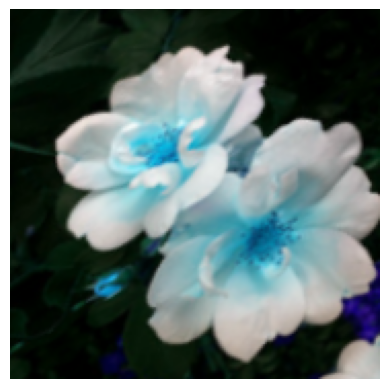

In [73]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))

In [74]:
#making CNN model
num_classes=5
model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    #Adding Flatten layer
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes),
])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [75]:
model.fit(x_train_scaled,y_train,epochs=30)


Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - accuracy: 0.3895 - loss: 1.3930
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 204ms/step - accuracy: 0.5788 - loss: 1.0654
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 196ms/step - accuracy: 0.6445 - loss: 0.9049
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 195ms/step - accuracy: 0.6644 - loss: 0.8714
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 195ms/step - accuracy: 0.6703 - loss: 0.8178
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 195ms/step - accuracy: 0.7271 - loss: 0.7494
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 195ms/step - accuracy: 0.7226 - loss: 0.7382
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 195ms/step - accuracy: 0.7401 - loss: 0.6942
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 193ms/step - accuracy: 0.7413 - loss: 0.6515
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 193ms/step - accuracy: 0.7639 - loss: 0.6034
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 193ms/step - accuracy: 0.7947 - loss: 0.5461
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17

In [76]:
model.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7232 - loss: 1.0726


[1.0149204730987549, 0.7352941036224365]